## Lead Brick Experiment

The following is the MDFO for the run with leadbricks

In [1]:
from MuonDataFrame import *
file = "processed_data/events_data_frame_56.h5"
mdfo = MuonDataFrame(file, isNew=False, d1="last") #Muon Data Frame Object 
mdf = mdfo.events_df
plt.rcParams['figure.figsize'] = [10, 7]

The following is the MDFO for the run with no leadbricks

In [2]:
file1 = "processed_data/events_data_frame_63.h5"
mdfo1 = MuonDataFrame(file1, isNew=False, d1="last") #Muon Data Frame Object 
mdf1 = mdfo1.events_df

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Comparison of the zenith angles

In [4]:
max_ang =np.arctan(65/200)*(360/np.pi)
max_ang

36.00832321182676

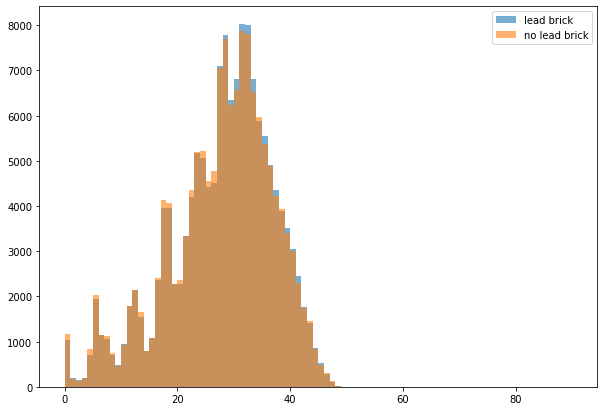

In [5]:
r1 = 0
r2 = 90
bins = 90

plt.hist(mdf['z_angle'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['z_angle'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

### Comparison of X Views

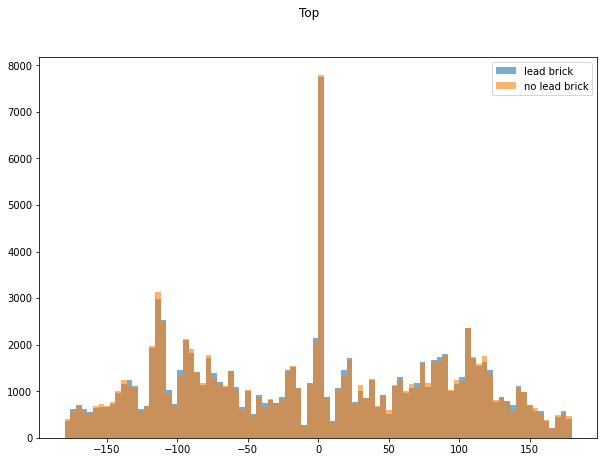

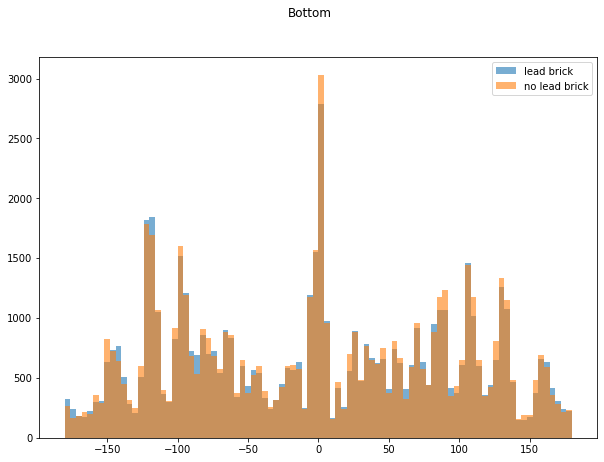

In [6]:
r1 = -180
r2 = 180
bins = 90

plt.suptitle("Top")
plt.hist(mdf['theta_x1'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_x1'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

plt.suptitle("Bottom")
plt.hist(mdf['theta_x2'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_x2'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

### Comparison of Y Views

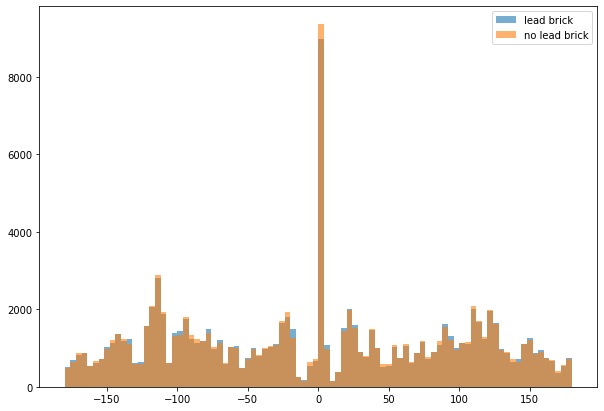

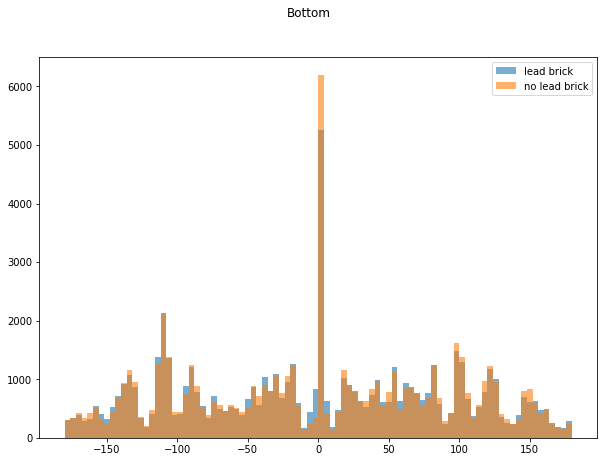

In [7]:
r1 = -180
r2 = 180
bins = 90

plt.hist(mdf['theta_y1'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_y1'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

plt.suptitle("Bottom")
plt.hist(mdf['theta_y2'],alpha=0.6,label="lead brick", range=(r1,r2), bins= bins)
plt.hist(mdf1['theta_y2'],alpha=0.6,label="no lead brick", range=(r1,r2), bins= bins)
plt.legend()
plt.show()

### Comparison of Tomograms

With lead bricks.

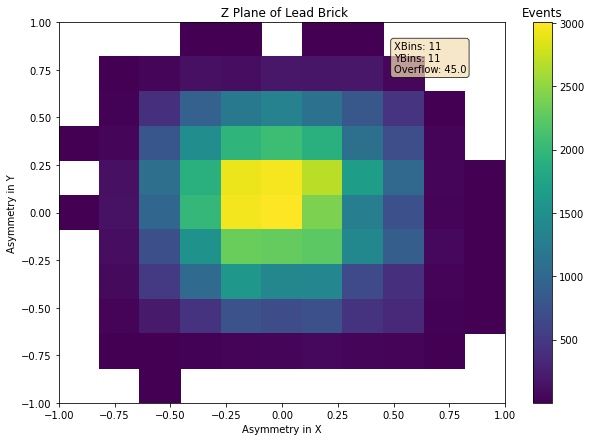

In [8]:
mdfo.get2DTomogram()

Without lead bricks

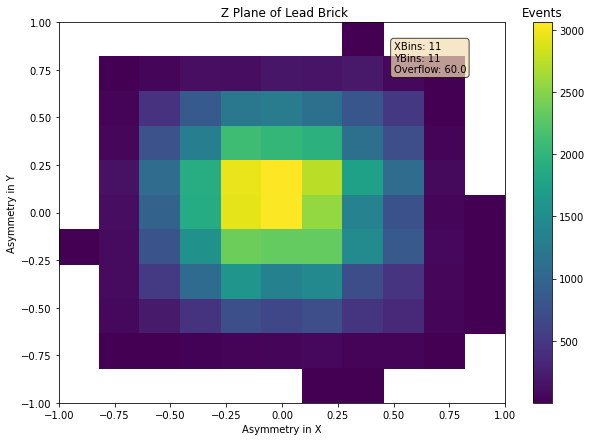

In [9]:
mdfo1.get2DTomogram()

### Generating the image: *1D Asymmetry Plot Projection and Comparison*

In [31]:
t = mdfo.getTValue()

# with lead brick
xx = mdfo.x(t)
yy = mdfo.y(t)

# without lead brick
xx1 = mdfo1.x(t)
yy1 = mdfo1.y(t)

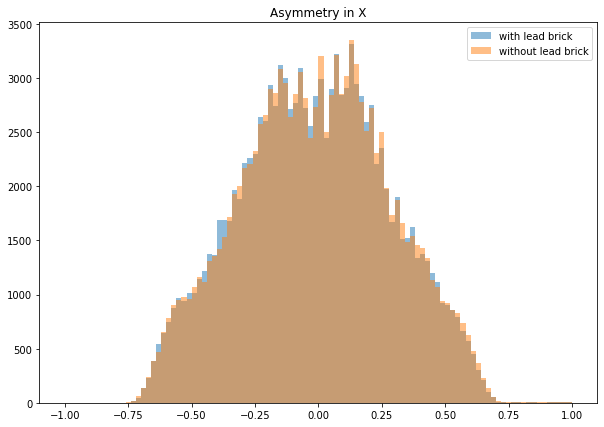

In [32]:
plt.hist(xx,alpha=0.5,bins=100,range=(-1,1),label="with lead brick")
plt.hist(xx1,alpha=0.5,bins=100,range=(-1,1),label="without lead brick")
plt.legend()
plt.title("Asymmetry in X")
plt.show()

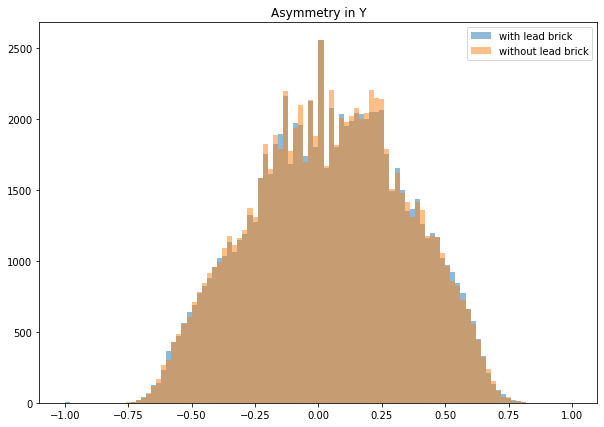

In [15]:
plt.hist(yy,alpha=0.5,bins=100,range=(-1,1),label="with lead brick")
plt.hist(yy1,alpha=0.5,bins=100,range=(-1,1),label="without lead brick")
plt.legend()
plt.title("Asymmetry in Y")
plt.show()

### 2D Tomogram

In [56]:
axes = [-1,1]

bins = (11,11)
ranges = (axes,axes)

h1, xedges, yedges = np.histogram2d(xx, yy, bins=bins, range=ranges)

In [57]:
axes = [-1,1]

bins = (11,11)
ranges = (axes,axes)

h2, xedges, yedges = np.histogram2d(xx1, yy1, bins=bins, range=ranges)

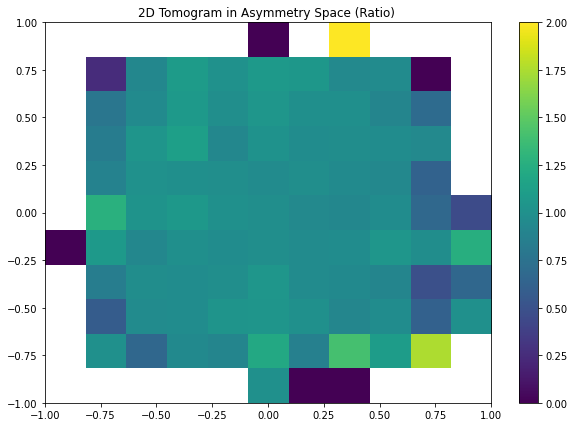

In [61]:
h = h1 / h2
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(xedges, yedges, h.T)
plt.title("2D Tomogram in Asymmetry Space (Ratio) ")
plt.colorbar(pc)
plt.show()

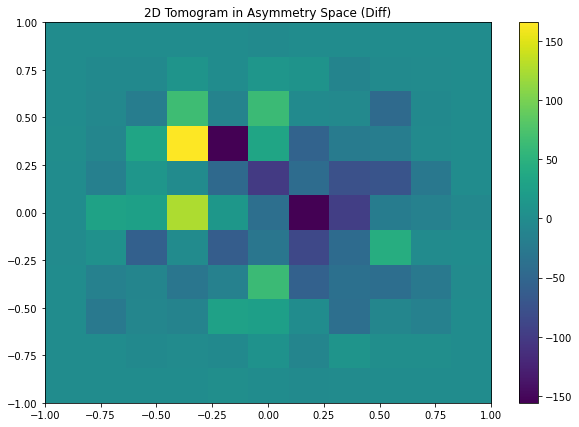

In [62]:
h = h1 - h2
fig, ax = plt.subplots(1)
pc = ax.pcolorfast(xedges, yedges, h.T)
plt.title("2D Tomogram in Asymmetry Space (Diff)")
plt.colorbar(pc)
plt.show()